# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Predicting whether a student will be offered a job after graduating given their GPA.

This is an example of classification because the outcome is categorical: either the student will be offered a job or they won't be.

2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.

This is not an example of classification. Instead, it's an example of regression because the outcome is a continuous value (number of months).

3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.

This is an example of classification because the outcome is choosing one among several discrete categories (1 to 5 stars). While there are numerical values associated with the categories, the number of possibilities is limited and distinct.

4. Predicting the number of births occurring in a specified minute.

This is not an example of classification. Instead, it's an example of regression because the outcome is predicting a continuous quantity (number of births, which can be any non-negative integer value).

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Data Splitting: Divide the dataset into Training, Validation, and Test sets.
Cross-Validation: Use k-fold cross-validation on the training data for a robust evaluation.
Data Shuffling: Shuffle data before splitting to ensure diverse samples (except for order-sensitive data).
Stratified Splitting: For imbalanced classes, maintain consistent class distribution across splits.
Train & Tune: Train on the training set; refine using the validation set.
Evaluate: Test the model's final performance on the test set.
Regularization: Apply techniques like L1 or L2 to prevent overfitting.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting:

When a model is too simple to capture data patterns, performing poorly on both training and unseen data.
Signs: Low performance on training data; similar poor performance on both training and validation/test sets; overly simple model architecture.

Overfitting:

When a model learns the training data too closely, including its noise, making it perform well on training but poorly on unseen data.
Signs: High training performance but much lower on validation/test data; growing performance gap between training and validation as training continues; overly complex model structure.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

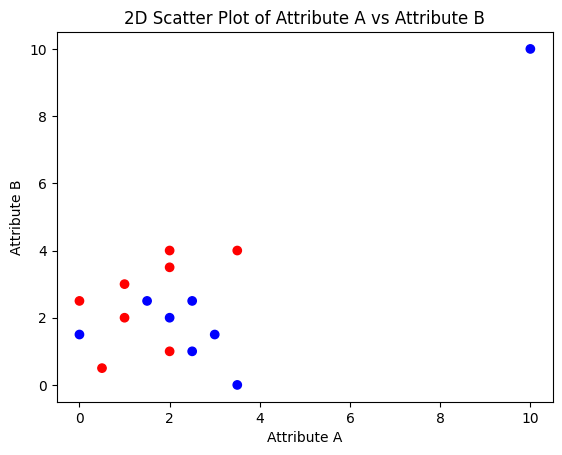

In [2]:
colors = np.array(['b', 'r'])

# Plotting
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot of Attribute A vs Attribute B")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [5]:
# Extracting the attributes
attribute_a = np.array(data["Attribute A"])
attribute_b = np.array(data["Attribute B"])

# For Attribute A
Q1_a = np.percentile(attribute_a, 25)
Q3_a = np.percentile(attribute_a, 75)
IQR_a = Q3_a - Q1_a
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

# For Attribute B
Q1_b = np.percentile(attribute_b, 25)
Q3_b = np.percentile(attribute_b, 75)
IQR_b = Q3_b - Q1_b
lower_bound_b = Q1_b - 1.5 * IQR_b
upper_bound_b = Q3_b + 1.5 * IQR_b

# Identifying outliers
outliers_a = np.where((attribute_a < lower_bound_a) | (attribute_a > upper_bound_a))
outliers_b = np.where((attribute_b < lower_bound_b) | (attribute_b > upper_bound_b))

# Combining the outlier indices
outlier_indices = np.union1d(outliers_a, outliers_b)

# Removing outliers from the dataset
for key in data:
    data[key] = [data[key][i] for i in range(len(data[key])) if i not in outlier_indices]

    


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

In summary, outliers are extreme values that might or might not be valid, while noise points are usually considered invalid data points that do not follow the general trend. Both can affect the performance of a model if not addressed appropriately.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

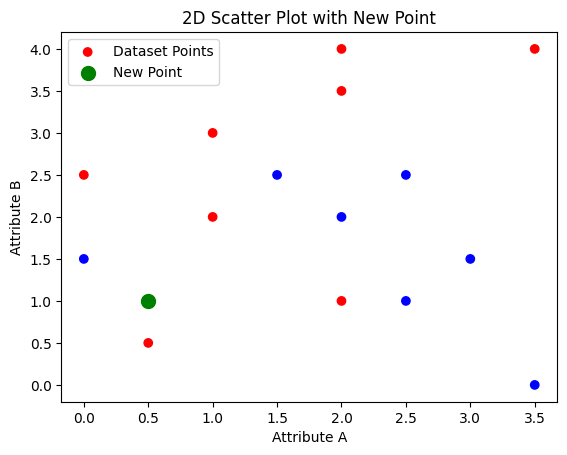

In [6]:
# Existing dataset points
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label='Dataset Points')
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")

# New point to be plotted
new_point_a = 0.5
new_point_b = 1
plt.scatter(new_point_a, new_point_b, color='g', label='New Point', s=100)  # using green color and larger size for emphasis

plt.title("2D Scatter Plot with New Point")
plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

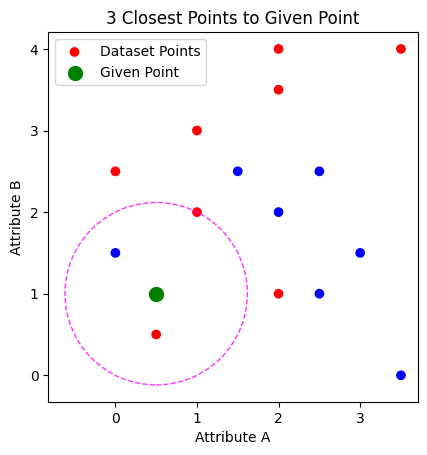

In [7]:
def n_closest_to(example, n):
    distances = []
    for i in range(len(data["Attribute A"])):
        dist = np.sqrt((data["Attribute A"][i] - example[0])**2 + (data["Attribute B"][i] - example[1])**2)
        distances.append((dist, (data["Attribute A"][i], data["Attribute B"][i])))
    
    # Sort distances and get top n points
    distances.sort(key=lambda x: x[0])
    closest_points = [item[1] for item in distances[:n]]
    max_distance = distances[n-1][0]
    
    return closest_points, max_distance

# Call the function
example_point = (0.5, 1)
n_points = 3
closest_pts, radius = n_closest_to(example_point, n_points)

# Scatter plot
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label='Dataset Points')
axes.scatter(example_point[0], example_point[1], color='g', label='Given Point', s=100)

# Draw the circle
cir = plt.Circle(example_point, radius, fill=False, alpha=0.8, edgecolor='magenta', linestyle='--')
axes.add_patch(cir)
axes.set_aspect('equal') 
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("3 Closest Points to Given Point")
plt.legend()
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [8]:
def majority(points):
    # Extract the classes of the closest points
    classes = [data["Class"][data["Attribute A"].index(point[0])] for point in points]
    
    # Count occurrences of each class
    class_counts = {cls: classes.count(cls) for cls in set(classes)}
    
    # Return the class with the majority count or a default class in case of tie
    max_count = max(class_counts.values())
    majority_classes = [cls for cls, count in class_counts.items() if count == max_count]
    
    # Return the majority class if there's a clear majority, otherwise return a default class (e.g., 0)
    return majority_classes[0] if len(majority_classes) == 1 else 0

# Get the class assigned to the given point
assigned_class = majority(closest_pts)
print(f"The class assigned to the point ({example_point[0]}, {example_point[1]}) is: {assigned_class}")


The class assigned to the point (0.5, 1) is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [9]:
def n_closest_to_leave_one_out(example, data_points, n):
    distances = []
    for point in data_points:
        dist = np.sqrt((point[0] - example[0])**2 + (point[1] - example[1])**2)
        distances.append((dist, point))
    
    # Sort distances and get top n points
    distances.sort(key=lambda x: x[0])
    closest_points = [item[1] for item in distances[:n]]
    max_distance = distances[n-1][0]
    
    return closest_points

count = 0
n_data_points = len(data["Attribute A"])

for i in range(n_data_points):
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]

    # Create training set by excluding the test point
    training_data_points = [(data["Attribute A"][j], data["Attribute B"][j]) for j in range(n_data_points) if j != i]
    
    closest_pts_in_training = n_closest_to_leave_one_out(test_point, training_data_points, n_points)
    prediction = majority(closest_pts_in_training)

    if prediction == actual_class:
        count += 1

accuracy = count / n_data_points
print(f"Overall accuracy = {accuracy*100:.2f}%")


Overall accuracy = 60.00%
